<a href="https://colab.research.google.com/github/woodstone10/data_visualization-python/blob/main/Stock_visualization_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock price visualization
- v1: matplotlib, mplfinance
- v2: bokeh


Reference:

https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

https://towardsdatascience.com/trading-toolbox-04-subplots-f6c353278f78

https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb

In [1]:
pip install mplfinance

     |████████████████████████████████| 61kB 2.9MB/s 


In [2]:
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import mplfinance as mpf #pip install mplfinance

import bokeh.plotting as bk
import bokeh.layouts
import bokeh.io
import bokeh.models
from math import pi

**Pandas Remote Data Access**, which is simpler than web crawling

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

---



In [7]:
end = dt.datetime.now()
#start = dt.datetime(2021, 1, 1)
span = 365*5 #days ago
start = end - dt.timedelta(days=span) #days ago

#TSLA = pdr.data.DataReader("TSLA", 'yahoo', start, end)
SSE = pdr.data.DataReader('005930', 'naver', start, end).astype(float) 
LGE = pdr.data.DataReader('066570', 'naver', start, end).astype(float) 
NAVER = pdr.data.DataReader('035420', 'naver', start, end).astype(float) 
KAKAO = pdr.data.DataReader('035720', 'naver', start, end).astype(float)

In [8]:
print(SSE.head())
print(SSE.tail())

               Open     High      Low    Close    Volume
Date                                                    
2016-04-06  25380.0  25820.0  25360.0  25700.0  184234.0
2016-04-07  26000.0  26000.0  25160.0  25380.0  258795.0
2016-04-08  25380.0  25380.0  24800.0  24920.0  251868.0
2016-04-11  24920.0  25420.0  24920.0  25320.0  120693.0
2016-04-12  25400.0  25620.0  25320.0  25500.0  134054.0
               Open     High      Low    Close      Volume
Date                                                      
2021-03-29  81700.0  81700.0  81000.0  81600.0  14952134.0
2021-03-30  81600.0  82300.0  81300.0  82200.0  13121698.0
2021-03-31  82400.0  82700.0  81400.0  81400.0  17240518.0
2021-04-01  82500.0  83000.0  82000.0  82900.0  18676461.0
2021-04-02  84000.0  85200.0  83900.0  84800.0  22997538.0


# matplotlib

---



In [23]:
def StockPlt(df, title, buying, buying_date, selling):
  plt.rcParams['figure.figsize'] = [14,7]
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3, colspan=1)
  av = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1, sharex=ax)  
  ax.plot(df.index, df['High'], color='gray', label='High', linestyle='--')
  ax.plot(df.index, df['Close'], color='black', label='Close', linestyle='-')
  ax.plot(df.index, df['Low'], color='lightgray', label='Low', linestyle=':')
  ax.hlines(buying, start, end, color='blue', alpha=0.5 )
  ax.text(buying_date, buying*1.005, 'buying', color='blue')
  ymin = df.filter(['Open', 'High', 'Low', 'Close']).min().min()
  ax.vlines(buying_date, ymin, buying, color='blue', alpha=0.5)
  target_selling = buying * (1 + selling)
  ax.hlines(target_selling, start, end, color='red', alpha=0.5)
  ax.text(end-dt.timedelta(days=span/2), target_selling*0.99, 'target selling', color='red')
  ax.legend()
  ax.set_title(title, size=10)
  av.bar(df.index, df['Volume'], color='gray')

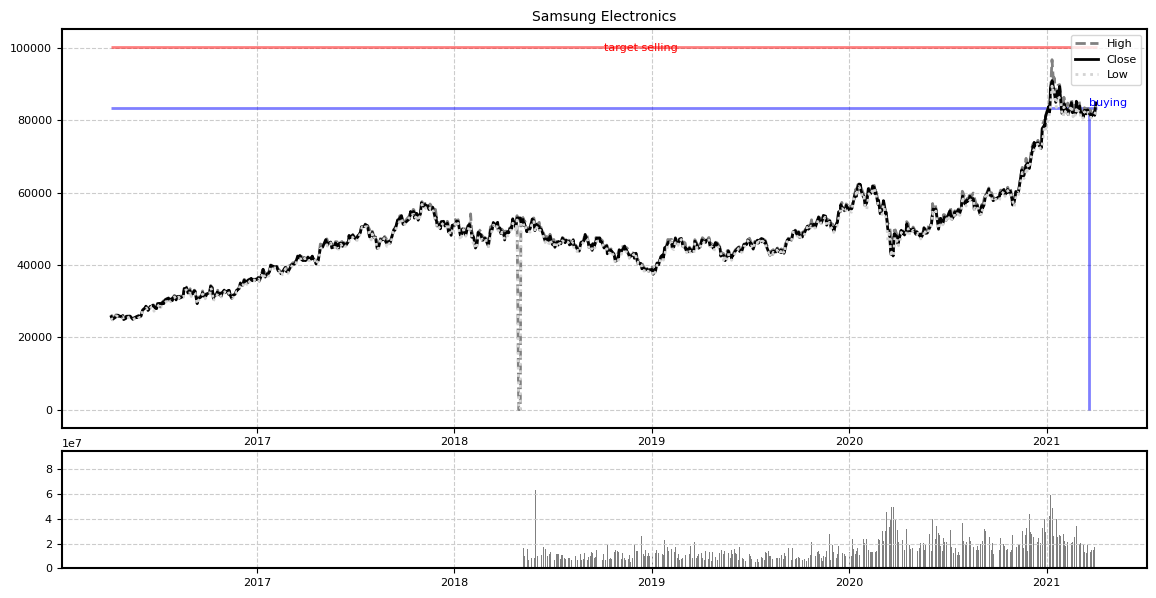

In [24]:
StockPlt(SSE,'Samsung Electronics', 83500, dt.datetime(2021, 3, 20), 0.2)

In [ ]:
StockPlt(LGE,'LG Electronics', 152000, dt.datetime(2021, 3, 30), 0.2)

# mplfinance (matplotlib finance)
- candlestick chart instead of line chart with 
- moving average value (3, 6, 9) days

---



In [ ]:
mpf.available_styles()

In [11]:
def StockMpf(df, title):
  mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size': 8})
  fig = mpf.figure(figsize=(14, 7), style=mpf_style) 
  ax = fig.add_subplot(2,1,1) 
  av = fig.add_subplot(2,1,2, sharex=ax)  
  ax.set_title(title, size=10)
  mpf.plot(df, 
           type='candle',
           ax=ax,  
           volume=av,        
           mav=(3,6,9),
           show_nontrading=True         
           )

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


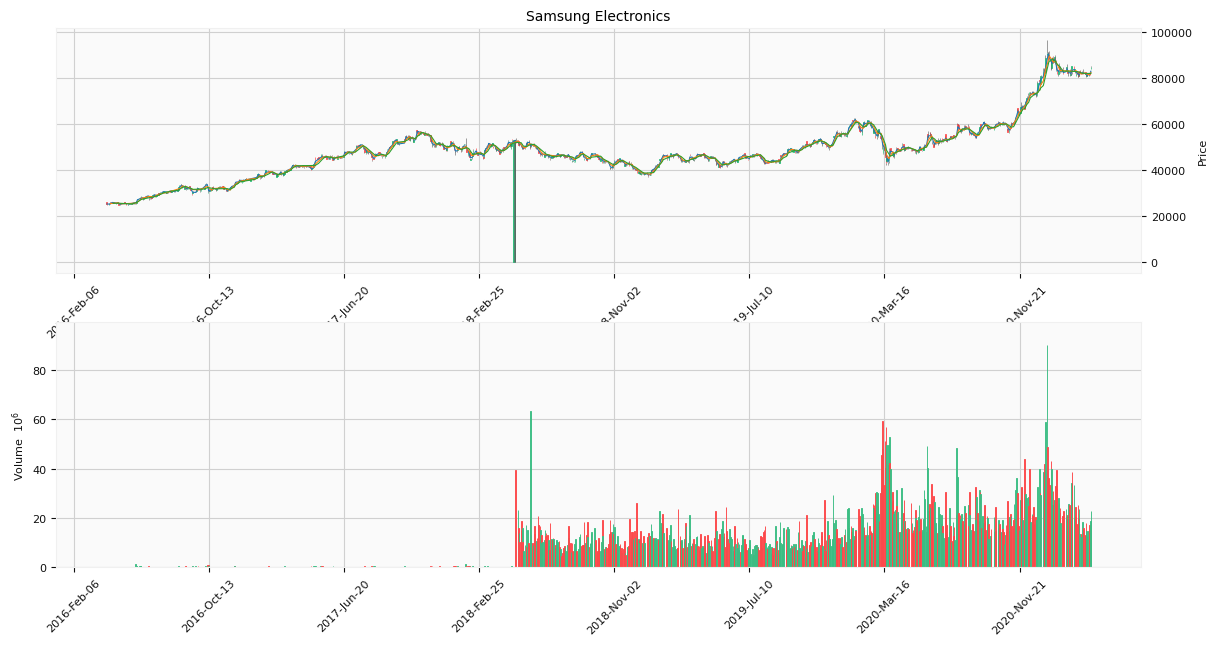

In [12]:
StockMpf(SSE,'Samsung Electronics')

In [ ]:
StockMpf(LGE,'LG Electronics')

In [13]:
def StockMpf_Classic(df, title):
  mpf_style = mpf.make_mpf_style(base_mpf_style='classic', rc={'font.size': 8})
  fig = mpf.figure(figsize=(14, 7), style=mpf_style) 
  ax = fig.add_subplot(2,1,1) 
  av = fig.add_subplot(2,1,2, sharex=ax)  
  ax.set_title(title, size=10)
  mpf.plot(df, type='candle',
          ax=ax,  
          volume=av,        
          mav=(3,6,9)         
          )

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


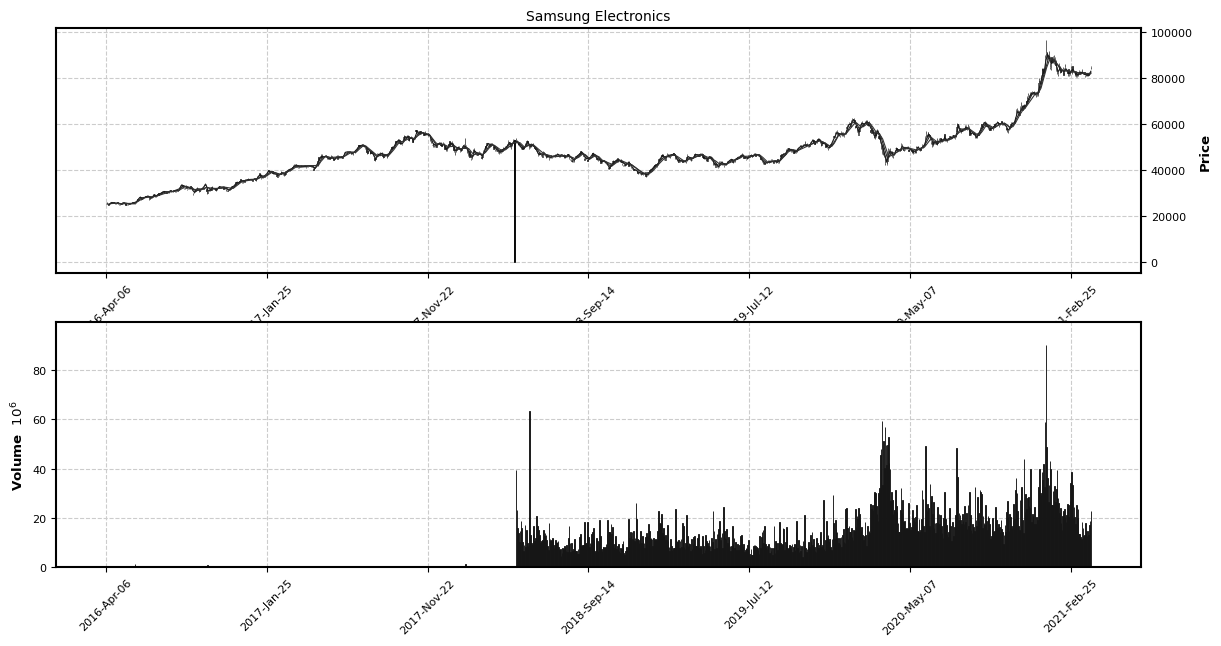

In [14]:
StockMpf_Classic(SSE,'Samsung Electronics')

# **Bokeh** (interactive visualization)

---
Reference: https://docs.bokeh.org/en/latest/docs/gallery/candlestick.html



In [15]:
def StockBk(df, title, buying, buying_date, selling):
  bokeh.io.output_notebook()

  # Pandas describe()
  print(df.describe())
  
  # Calculate moving averages of the closing prices
  close = df.loc[:, 'Close']
  mav_1w = close.rolling(window=7).mean() #1 week
  mav_1m = close.rolling(window=30).mean() #1 month
  
  # candle stick
  inc = df['Close'] > df['Open'] 
  dec = df['Open'] > df['Close']
  w = 12*60*60*1000 #half day in ms

  p = bk.figure(title=title, plot_width = 1100, plot_height = 400, 
                x_axis_type = "datetime", y_axis_label = 'price')
  p.xaxis.major_label_orientation = pi/4
  p.grid.grid_line_alpha=0.3
  p.segment(df.index, df['High'], df.index, df['Low'], 
            #legend_label=title, 
            color="black")
  p.vbar(df.index[inc], w, df['Open'][inc], df['Close'][inc], 
         fill_color="red", line_color="black")
  p.vbar(df.index[dec], w, df['Open'][dec], df['Close'][dec], 
         fill_color="blue", line_color="black")
  p.line(df.index, mav_1w, color='lightgreen', line_width=1, alpha=0.9)
  p.line(df.index, mav_1m, color='green', line_width=1, alpha=0.6)
  vline = bokeh.models.Span(location=buying_date, dimension='height', 
                            line_color='lightgray', line_width=1)
  hline = bokeh.models.Span(location=buying, dimension='width', 
                            line_color='lightgray', line_width=1)
  p.renderers.extend([vline, hline])
  target_selling = buying * (1 + selling)
  hline = bokeh.models.Span(location=target_selling, dimension='width', 
                            line_color='lightcoral', line_width=1)
  p.renderers.extend([hline])
  
  p2 = bk.figure(plot_width=1100, plot_height=200, 
                 x_axis_type="datetime", y_axis_label = 'volume',
                 x_range=p.x_range)
  p2.xaxis.major_label_orientation = pi/4
  p2.grid.grid_line_alpha=0.3
  p2.vbar(df.index, w, df['Volume'], [0]*df.shape[0])

  bk.show(bokeh.layouts.column(p, p2))

In [16]:
StockBk(SSE,'Samsung Electronics', 83500, dt.datetime(2021, 3, 20), 0.2)

               Open          High           Low         Close        Volume
count   1226.000000   1226.000000   1226.000000   1226.000000  1.226000e+03
mean   48072.506525  48586.954323  47584.657423  48216.223491  9.606089e+06
std    12594.717695  12775.332675  12442.405605  12357.462081  1.077235e+07
min        0.000000      0.000000      0.000000  24900.000000  0.000000e+00
25%    42200.000000  42742.500000  41857.500000  42452.500000  2.405305e+05
50%    47000.000000  47400.000000  46550.000000  47010.000000  8.153556e+06
75%    52500.000000  53180.000000  51900.000000  52630.000000  1.519055e+07
max    90300.000000  96800.000000  89500.000000  91000.000000  9.030618e+07
